In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv("housing.csv")

In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [16]:
for i in df[df.total_bedrooms.isnull()].index:
    df.iloc[i,4]=0

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,532.476211,422.678333,0.0000,292.0000,431.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [18]:
grouped = df.groupby('ocean_proximity')
group_names = []
for name,group in grouped: group_names.append(name)
group_names = np.array(group_names, dtype=object)

In [19]:
group_names

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [20]:
df = pd.get_dummies(df,columns=["ocean_proximity"])

In [21]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [25]:
X = df.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [27]:
y = df[["median_house_value"]]
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

In [36]:
y_pred = lin_reg.predict(X_test)

In [37]:
mean_squared_error(y_pred, y_test)

4735457036.336932

In [39]:
lin_reg.score(X_test,y_test)

0.6368388946634149

In [40]:
lin_reg.intercept_

array([-2214767.65691844])

In [71]:
coef = lin_reg.coef_.tolist()
coef=coef[0]

In [72]:
pd.Series(coef, index=X.columns.values)

longitude                     -26521.562562
latitude                      -25261.464753
housing_median_age              1068.617297
total_rooms                       -3.153289
total_bedrooms                    48.660548
population                       -39.385604
households                        94.240902
median_income                  38422.826742
ocean_proximity_<1H OCEAN     -25007.263375
ocean_proximity_INLAND        -64078.903769
ocean_proximity_ISLAND        137613.674161
ocean_proximity_NEAR BAY      -29187.850261
ocean_proximity_NEAR OCEAN    -19339.656756
dtype: float64

In [88]:
# train error (RMSE)
mean_squared_error(y_train, lin_reg.predict(X_train)) ** .5

68770.91128178839

In [89]:
# test error (RMSE)
mean_squared_error(y_test, lin_reg.predict(X_test)) **.5

68814.65713303331

### With StatsModels

In [76]:
import statsmodels.api as sm

In [84]:
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3120.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:38:06   Log-Likelihood:            -2.5919e+05
No. Observations:               20640   AIC:                         5.184e+05
Df Residuals:                   20627   BIC:                         5.185e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude                  -2.607e+04   1013.307    -25.728      0.000   -2.81e+04   -2.41e+04
latitude                    -2.49e+04    999.923    -24.907      0.000   -2.69e+04   -2.29e+04
housing_median_age          1051.9690     43.738     24.052      0.000     966.239    1137.699
total_rooms                   -3.5383      0.748     -4.732      0.000      -5.004      -2.073
total_bedrooms                50.8012      4.964     10.234      0.000      41.071      60.531
population                   -40.0736      1.058    -37.892      0.000     -42.147     -38.001
households                    95.5881      6.040     15.827      0.000      83.750     107.426
median_income                3.84e+04    327.698    117.194      0.000    3.78e+04     3.9e+04
ocean_proximity_<1H OCEAN  -2.198e+06   8.74e+04    -25.148      0.000   -2.37e+06   -2.03e+06
ocean_proximity_INLAND     -2.238e+06   8.64e+04    -25.909      0.000   -2.41e+06   -2.07e+06
ocean_proximity_ISLAND      -2.04e+06   9.33e+04    -21.856      0.000   -2.22e+06   -1.86e+06
ocean_proximity_NEAR BAY   -2.201e+06   8.78e+04    -25.063      0.000   -2.37e+06   -2.03e+06
ocean_proximity_NEAR OCEAN -2.193e+06   8.77e+04    -24.992      0.000   -2.36e+06   -2.02e+06
==============================================================================
Omnibus:                     5230.986   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20003.978
Skew:                           1.225   Prob(JB):                         0.00
Kurtosis:                       7.154   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'pred with test')

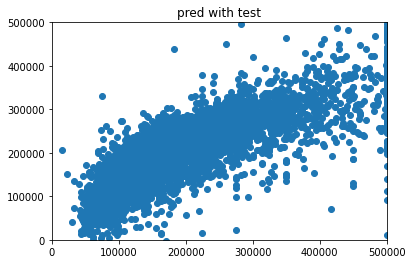

In [97]:
plt.scatter(y_test, y_pred)
plt.xlim(0,5e5)
plt.ylim(0,5e5)
plt.title("pred with test")